In [1]:
from neo import Block
from neo.io import Spike2IO, NeoMatlabIO
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
from kaveh.behavioral import oculomotor
from kaveh.sorting import spikesorter
from kaveh.toolbox import find_file
from kaveh.plots import axvlines
import numpy as np
from matplotlib import pyplot as plt
from smr import File
import csv
import os
import gc

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
buckley_files_correct_events = ['B082107_1340_List.smr',
'B090407_1526_List.smr',
'B091208_1545_List.smr',
'B091608_1208_List.smr',
'B091707_1414_List.smr', 
'B091908_1_1500_List.smr', 
'B091908_2_1550_List.smr',
'B093008_1149_List.smr',
'B100308_2_1403_List.smr',
'B101707_1333_List.smr',
'B121407_1_1124_List.smr',
'W091008_1241_List.smr',
'W091208_1337_List.smr',
'W120108_1622_List.smr',
'W120208_1_1418_List.smr',
'W120308_2_1714_List.smr',
'W120508_1_1420_List.smr',
'W120508_2_1628_List.smr']

f_name_csv = find_file(buckley_files_correct_events[1]+'.pkl.csv', '../data/david_neurons/')
f_name_smr = find_file(buckley_files_correct_events[1], '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt')

In [4]:
neo_reader = Spike2IO(filename=f_name_smr)
neo_data = neo_reader.read()
data_block = neo_data[0]

seg = data_block.segments[0]


In [5]:
with open(f_name_csv, 'r') as csv_f:
    reader = csv.reader(csv_f)
    csv_content = np.array(list(reader), dtype=np.int64)

In [6]:
cs_indices = np.squeeze(csv_content[np.where(csv_content[:,1] == 1), 0])

In [7]:
voltage = np.asarray(seg.analogsignals[-1])
t_voltage = seg.analogsignals[-1].times
fs = seg.analogsignals[-1].sampling_rate

In [8]:
t_max = 510
t_max_index = np.where(t_voltage > t_max)[0][0]

In [9]:
cs_indices = cs_indices/fs

In [11]:
cs_indices.shape

(76,)

In [ ]:
np.where(cs_indices > t_max_index)[0][0]

<IPython.core.display.Javascript object>


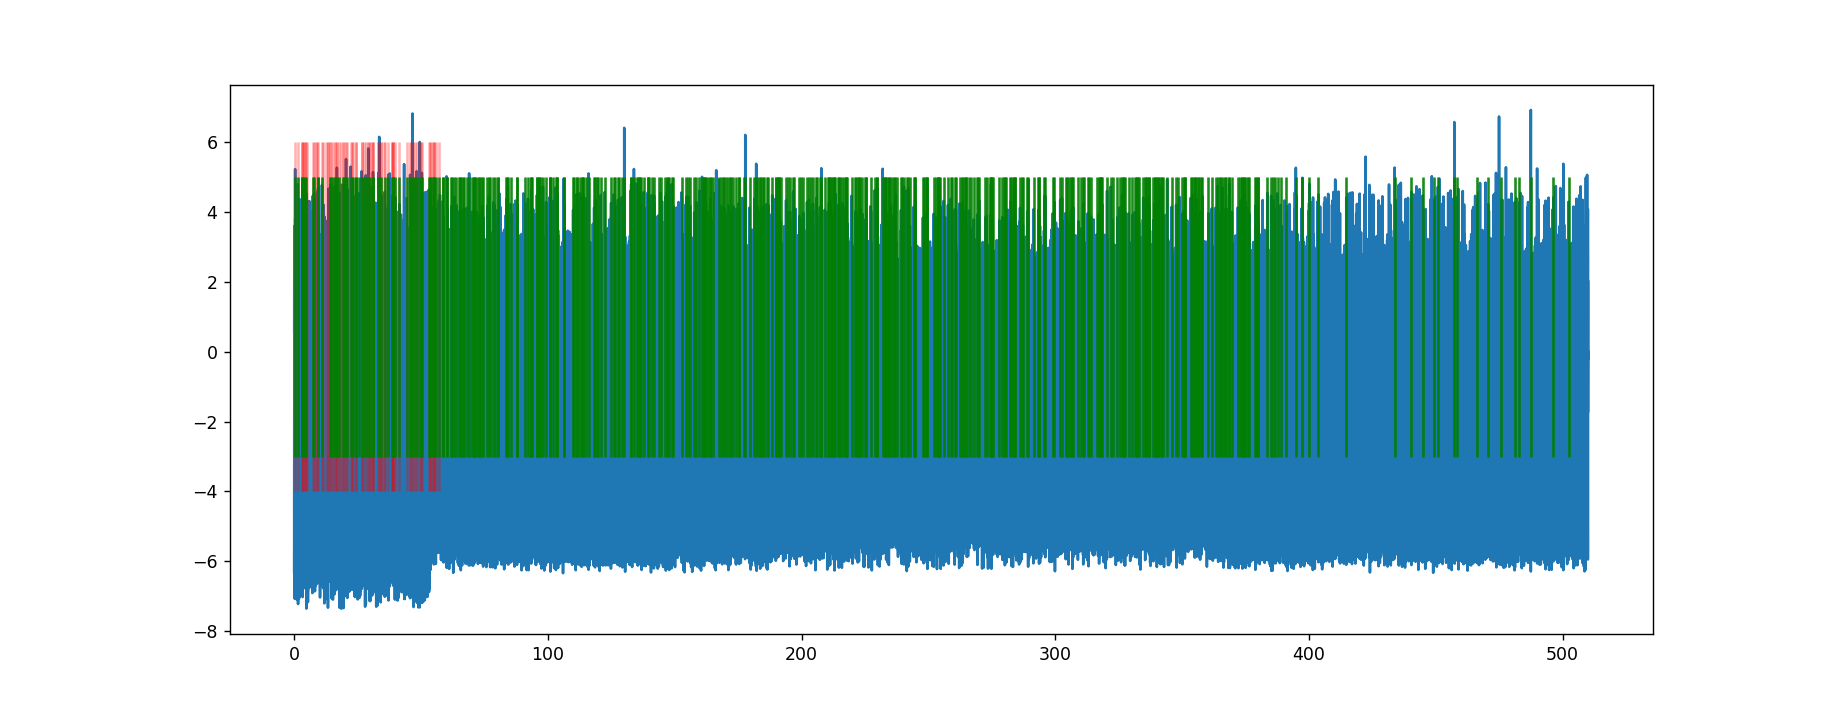

In [12]:
gc.collect()
plt.figure()
plt.plot(t_voltage[t_voltage<t_max], voltage[t_voltage<t_max])
plt.show()

In [13]:
plt.eventplot(cs_indices[cs_indices < t_max], linelengths=10 ,colors='r', alpha = 0.3, zorder=10)

In [14]:
cs_man = seg.spiketrains[0].times

In [15]:
plt.eventplot(cs_man[cs_man<t_max] , linelengths=8 ,colors='g', alpha = 0.9, zorder=10)

In [ ]:
# Get the index of the complex spike between time ranges
cs_indices[np.where(np.logical_and(cs_indices <135.7, cs_indices>135.6 ))]*fs